In [1]:
# import required libraries
import pandas as pd
import pickle
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [2]:
# Mounting Google drive on colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
print(os.listdir("."))

['.config', 'drive', 'sample_data']


In [0]:
# Loading preprocessed final dataframe from google drive

final = pd.read_pickle('/content/drive/My Drive/Aaic/final_0317.pkl')

In [5]:
final.shape

(364171, 12)

In [6]:
final.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'CleanedText', 'CleanedSummary'],
      dtype='object')

In [8]:
final.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,CleanedSummary
138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witty little book makes son laugh loud recite ...,every book educational
138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew reading sendak books watching really rosi...,love book miss hard cover version
138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn months year learn poems...,chicken soup rice months
138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great little book read aloud nice rhythm well ...,good swingy rhythm reading aloud
138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetry months year goes month cute little...,great way learn months


In [0]:
final_100k = final[:100000]

In [0]:
# Create X and Y variable 
X = final_100k['CleanedText'].values
y= final_100k['Score'].values

In [0]:
# Splitting into train and test in the ratio 70:30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,shuffle=False, random_state=507)

In [0]:
# https://stackoverflow.com/questions/51699001/tokenizer-texts-to-sequences-keras-tokenizer-gives-almost-all-zeros
# https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/discussion/49893
# https://github.com/keras-team/keras/issues/7551
from keras.preprocessing.text import Tokenizer

top_words = 5000

tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [11]:
print(X_train[1])
print(type(X_train[1]))
print(len(X_train[1]))

[825, 643, 2954, 1300, 16, 1073, 10, 374, 94, 123, 1256, 98, 1222, 388, 351, 276, 4779, 470, 49, 819, 92, 383]
<class 'list'>
22


In [0]:
#from keras.utils.np_utils import to_categorical
#y_train = to_categorical(y_train, )
#y_test = to_categorical(y_test, 2)


After converting the output into a vector :  1


In [9]:
# truncate and/or pad input sequences
max_review_length = 600
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(70000, 600)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    

In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [11]:
# Model 1
# Embedding-LSTM(100)-Dense(1)

embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
#Refer: https://datascience.stackexchange.com/questions/10615/number-of-parameters-in-an-lstm-model

W0807 12:06:38.440216 139699082893184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0807 12:06:38.455814 139699082893184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 12:06:38.459019 139699082893184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0807 12:06:38.668070 139699082893184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0807 12:06:38.686245 139699082893184 deprecation_wrappe

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 600, 32)           160032    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,333
Trainable params: 213,333
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
batchsize = 5000
nb_epoch = 15

Train on 70000 samples, validate on 30000 samples
Epoch 1/15
70000/70000 [==============================] - 40s 576us/step - loss: 0.5937 - acc: 0.8273 - val_loss: 0.4603 - val_acc: 0.8522
Epoch 2/15
70000/70000 [==============================] - 39s 556us/step - loss: 0.4251 - acc: 0.8519 - val_loss: 0.4107 - val_acc: 0.8522
Epoch 3/15
70000/70000 [==============================] - 39s 556us/step - loss: 0.4079 - acc: 0.8519 - val_loss: 0.3986 - val_acc: 0.8522
Epoch 4/15
70000/70000 [==============================] - 39s 556us/step - loss: 0.3824 - acc: 0.8519 - val_loss: 0.3566 - val_acc: 0.8522
Epoch 5/15
70000/70000 [==============================] - 39s 555us/step - loss: 0.3135 - acc: 0.8628 - val_loss: 0.2708 - val_acc: 0.8855
Epoch 6/15
70000/70000 [==============================] - 39s 557us/step - loss: 0.2323 - acc: 0.9054 - val_loss: 0.2247 - val_acc: 0.9143
Epoch 7/15
70000/70000 [==============================] - 39s 556us/step - loss: 0.2260 - acc: 0.9130 - val_loss: 0.

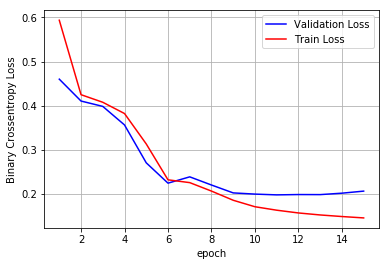

In [86]:
history = model.fit(X_train, y_train, epochs=nb_epoch, 
                   batch_size=batchsize, verbose=1, validation_data=(X_test, y_test))

%matplotlib inline
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [15]:
# Model 2
# Embedding-LSTM(128)-Dense(512)+Dropout(0.25)-LSTM(64)-Dense(256)-Dense(1)

from keras.layers import Dense, Dropout

embedding_vecor_length = 64
model = Sequential()

model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))

model.add(LSTM(128, return_sequences=True))

model.add(Dense(512, activation = 'elu', kernel_initializer = 'lecun_normal'))
model.add(Dropout(0.25))

model.add(LSTM(256))

model.add(Dense(256, activation = 'elu', kernel_initializer = 'lecun_normal'))
model.add(Dropout(0.5))
          

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])


print(model.summary())

W0807 10:37:20.602443 139817305565056 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0807 10:37:20.627110 139817305565056 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 600, 64)           320064    
_________________________________________________________________
lstm_2 (LSTM)                (None, 600, 128)          98816     
_________________________________________________________________
dense_2 (Dense)              (None, 600, 512)          66048     
_________________________________________________________________
dropout_1 (Dropout)          (None, 600, 512)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 256)               787456    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

In [0]:
nb_epoch = 15
batchsize  = 1000

Train on 70000 samples, validate on 30000 samples
Epoch 1/15
70000/70000 [==============================] - 266s 4ms/step - loss: 0.3381 - acc: 0.8706 - val_loss: 0.2102 - val_acc: 0.9146
Epoch 2/15
70000/70000 [==============================] - 265s 4ms/step - loss: 0.1941 - acc: 0.9246 - val_loss: 0.1996 - val_acc: 0.9205
Epoch 3/15
70000/70000 [==============================] - 265s 4ms/step - loss: 0.1716 - acc: 0.9340 - val_loss: 0.1934 - val_acc: 0.9251
Epoch 4/15
70000/70000 [==============================] - 265s 4ms/step - loss: 0.1595 - acc: 0.9390 - val_loss: 0.1946 - val_acc: 0.9257
Epoch 5/15
70000/70000 [==============================] - 265s 4ms/step - loss: 0.1505 - acc: 0.9431 - val_loss: 0.1996 - val_acc: 0.9239
Epoch 6/15
70000/70000 [==============================] - 265s 4ms/step - loss: 0.1418 - acc: 0.9474 - val_loss: 0.2054 - val_acc: 0.9243
Epoch 7/15
70000/70000 [==============================] - 265s 4ms/step - loss: 0.1313 - acc: 0.9527 - val_loss: 0.2085 - 

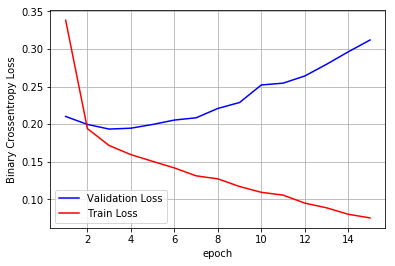

In [21]:
history = model.fit(X_train, y_train, epochs=nb_epoch, 
                   batch_size=batchsize, verbose=1, validation_data=(X_test, y_test))

%matplotlib inline
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
nb_epoch = 15
batchsize  = 1500

In [13]:
# Model 3
# Embedding-LSTM(100)-Dense(128)+Dropout(0.25)+BatchNorm-LSTM(100)-Dense(64)+Dropout(0.5)+BatchNorm-LSTM(100)-Dense(32)-Dense(16)+BatchNorm-LSTM(64)-Dense(16)+BatchNorm-Dense(1)

from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout

embedding_vecor_length = 64
model = Sequential()

model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))

model.add(LSTM(100, return_sequences=True))

model.add(Dense(128,  kernel_initializer = 'he_uniform', activation = 'selu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(LSTM(100, return_sequences=True))

model.add(Dense(64, activation = 'selu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(LSTM(100, return_sequences=True))

model.add(Dense(32, activation = 'selu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())


model.add(LSTM(64))
model.add(Dense(16, activation = 'selu'))
model.add(BatchNormalization())


model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy', optimizer='nadam', metrics=['accuracy'])


print(model.summary())





W0807 12:06:53.837769 139699082893184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0807 12:06:53.844717 139699082893184 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 600, 64)           320064    
_________________________________________________________________
lstm_2 (LSTM)                (None, 600, 100)          66000     
_________________________________________________________________
dense_2 (Dense)              (None, 600, 128)          12928     
_________________________________________________________________
dropout_1 (Dropout)          (None, 600, 128)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 600, 128)          512       
_________________________________________________________________
lstm_3 (LSTM)                (None, 600, 100)          91600     
_________________________________________________________________
dense_3 (Dense)              (None, 600, 64)           6464      
__________

Train on 70000 samples, validate on 30000 samples
Epoch 1/15
70000/70000 [==============================] - 306s 4ms/step - loss: 0.5632 - acc: 0.7437 - val_loss: 0.3734 - val_acc: 0.8681
Epoch 2/15
70000/70000 [==============================] - 289s 4ms/step - loss: 0.3421 - acc: 0.9046 - val_loss: 0.3966 - val_acc: 0.8815
Epoch 3/15
70000/70000 [==============================] - 285s 4ms/step - loss: 0.2268 - acc: 0.9309 - val_loss: 0.7106 - val_acc: 0.8174
Epoch 4/15
70000/70000 [==============================] - 286s 4ms/step - loss: 0.1917 - acc: 0.9356 - val_loss: 0.5443 - val_acc: 0.8875
Epoch 5/15
70000/70000 [==============================] - 286s 4ms/step - loss: 0.1643 - acc: 0.9438 - val_loss: 0.3651 - val_acc: 0.8948
Epoch 6/15
70000/70000 [==============================] - 286s 4ms/step - loss: 0.1395 - acc: 0.9511 - val_loss: 0.3441 - val_acc: 0.9228
Epoch 7/15
70000/70000 [==============================] - 286s 4ms/step - loss: 0.1219 - acc: 0.9582 - val_loss: 4.0275 - 

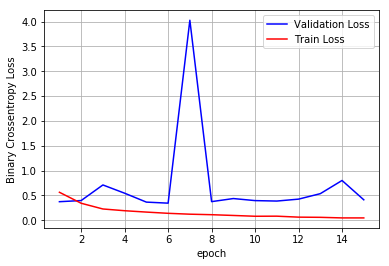

In [14]:
history = model.fit(X_train, y_train, epochs=nb_epoch, 
                   batch_size=batchsize, verbose=1, validation_data=(X_test, y_test))

%matplotlib inline
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Binary Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Summary
1. Implemented LSTM on Amazon Fine Food Reviews to determine whether a given summary is positive or negative.
2. Experiement with 3 models; each had different architecture, weight initializers, activation function, number of hidden layers, number of LSTM layers, optimization function etc
3. Also made use of different dropout values and batchnormalization of the above architectures.
4. Plotted error plot of epoch against training and validataion set. 
5. The number of epochs considered: 15.

### Model 1
* Embedding-LSTM(100)-Dense(1)
* batchsize = 5000

### Model 2
* Embedding-LSTM(128)-Dense(512)+Dropout(0.25)-LSTM(64)-Dense(256)-Dense(1)
* batchsize = 1000

### Model 3
*  Embedding-LSTM(100)-Dense(128)+Dropout(0.25)+BatchNorm-LSTM(100)-Dense(64)+Dropout(0.5)+BatchNorm-LSTM(100)-Dense(32)-Dense(16)+BatchNorm-LSTM(64)-Dense(16)+BatchNorm-Dense(1)
* batchsize = 1500



In [16]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Activation Function", "Optimization", "Weight Initializer", "Test Score", "Test Accuracy"]

x.add_row(["Model 1", 'relu', 'adam', 'glurot_uniform',  0.20672382185558477, 0.9238])
x.add_row(["Model 2", 'elu','adamax', 'lecun_normal', 0.31187168813596167,  0.9139])
x.add_row(["Model 3", 'selu', 'nadam', 'he_uniform', 0.4115698112430672, 0.9095])

print(x)

+---------+---------------------+--------------+--------------------+---------------------+---------------+
|  Model  | Activation Function | Optimization | Weight Initializer |      Test Score     | Test Accuracy |
+---------+---------------------+--------------+--------------------+---------------------+---------------+
| Model 1 |         relu        |     adam     |   glurot_uniform   | 0.20672382185558477 |     0.9238    |
| Model 2 |         elu         |    adamax    |    lecun_normal    | 0.31187168813596167 |     0.9139    |
| Model 3 |         selu        |    nadam     |     he_uniform     |  0.4115698112430672 |     0.9095    |
+---------+---------------------+--------------+--------------------+---------------------+---------------+
